In [ ]:
import pandas as pd
import numpy as np


### Pandas Merge

Параметры функции pandas.merge() используются для настройки операции объединения (merge) двух DataFrame в Pandas. Вот основные параметры, которые можно указать при использовании merge():


* left: Левый DataFrame, который будет использоваться для объединения.
* right: Правый DataFrame, с которым будет производиться объединение.
* how: Определяет тип объединения. Возможные значения: 'inner' (внутреннее объединение), 'outer' (внешнее объединение), 'left' (левое объединение), 'right' (правое объединение). Значение по умолчанию - 'inner'.
* on: Столбец или список столбцов, по которым будет производиться объединение. Если не указан, используются все общие столбцы с одинаковыми именами в обоих DataFrame.
* left_on и right_on: Столбцы или списки столбцов в левом и правом DataFrame соответственно, по которым будет производиться объединение, если имена столбцов отличаются.
* left_index и right_index: Логические значения, указывающие, следует ли использовать индексы левого и/или правого DataFrame для объединения вместо столбцов.
* suffixes: Список суффиксов, которые будут добавлены к именам столбцов, если имена столбцов в левом и правом DataFrame конфликтуют. По умолчанию используются суффиксы '_x' и '_y'.
* sort: Логическое значение, указывающее, следует ли сортировать объединенный DataFrame по столбцам. Значение по умолчанию - False.

## How

* inner (по умолчанию): включает только те строки, для которых значения в сопоставляемых столбцах или индексах обоих DataFrame совпадают.
* left: включает все строки из левого (первого) DataFrame и только совпадающие строки из правого (второго) DataFrame. Если значения в сопоставляемых столбцах или индексах не совпадают, то для правого DataFrame будут добавлены значения NaN.
* right: включает все строки из правого (второго) DataFrame и только совпадающие строки из левого (первого) DataFrame. Если значения в сопоставляемых столбцах или индексах не совпадают, то для левого DataFrame будут добавлены значения NaN.
* outer: включает все строки из обоих DataFrame и заполняет значениями NaN для неподходящих сопоставлений.

In [ ]:
df_1 = pd.DataFrame({'Key': ['A', 'B', 'C', 'D'],
                    'Value1': [1, 2, 3, 4]})

df_2 = pd.DataFrame({'Key': ['B', 'D', 'E', 'F'],
                    'Value2': [5, 6, 7, 8]})

In [ ]:
pd.merge(df_1, df_2, how='outer')

,Key,Value1,Value2
0,A,1.0,NaN
1,B,2.0,5.0
2,C,3.0,NaN
3,D,4.0,6.0
4,E,NaN,7.0
5,F,NaN,8.0


In [ ]:
df_1 = pd.DataFrame({'Key': ['A', 'B', 'C', 'D'],
                     'Key_2' : ['B', 'C', 'D', 'E'],
                    'Value': [1, 2, 3, 4]})

df_2 = pd.DataFrame({'Key': ['B', 'D', 'A', 'F'],
                     'Key_2' : ['C', 'E', 'A', 'B'],
                    'Value1': [5, 6, 7, 8]})

In [ ]:
pd.merge(df_1, df_2)

,Key,Key_2,Value,Value1
0,B,C,2,5
1,D,E,4,6


## Task

## Import Datasets

In [ ]:
!wget 'https://www.dropbox.com/scl/fi/ykmyhzv65qicf8t229nox/Datasets.zip?rlkey=o6wvvdpscam9d7gahupe0xdv2&dl=0'  -O 'Datasets.zip'

In [ ]:
import shutil
# Мы получили папку с файлами CSV, которая имеет вид ZIP архива. Ее нужно разархивировать.
# Путь к zip-файлу, который вы хотите разархивировать
zip_file_path = '/content/Datasets.zip' # Локальная дирректория (временная)

# Путь, куда вы хотите разархивировать файлы
extracted_folder_path = '/content/Datasets'

# Разархивация zip-файла
shutil.unpack_archive(zip_file_path, extracted_folder_path, 'zip')

In [ ]:
%cd /content/Datasets/Datasets # Cмена рабочей дирректории. Указываем путь к папке, в которой лежат файлы.

/content/Datasets/Datasets


In [ ]:
best_CPI = pd.read_csv('Best_CPI.csv').drop('Unnamed: 0', axis=1)
best_GDP = pd.read_csv('Best_GDP.csv').drop('Unnamed: 0', axis=1)
best_holidays = pd.read_csv('Best_Holidays.csv').drop('Unnamed: 0', axis=1)
sample_submission = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [ ]:
best_CPI.head()

,year,country,CPI
0,2015,Finland,-0.207929
1,2015,Norway,2.171137
2,2015,Sweden,-0.046785
3,2016,Finland,0.356685
4,2016,Norway,3.550000


In [ ]:
best_CPI.shape

(15, 3)

In [ ]:
best_GDP.head()

,year,country,GDP
0,2015,Finland,234.440
1,2015,Norway,385.802
2,2015,Sweden,505.104
3,2016,Finland,240.608
4,2016,Norway,368.827


In [ ]:
best_GDP.shape

(15, 3)

In [ ]:
best_holidays.head()

,date,country,type
0,2015-01-01,Norway,public
1,2015-02-08,Norway,unofficial
2,2015-02-14,Norway,unofficial
3,2015-03-20,Norway,other
4,2015-03-29,Norway,unofficial


In [ ]:
best_holidays.shape

(432, 3)

In [ ]:
sample_submission.head()

,row_id,num_sold
0,26298,100
1,26299,100
2,26300,100
3,26301,100
4,26302,100


In [ ]:
test.head()

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat


In [ ]:
train.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


## Перед вами несколько датафреймов. Их необходимо "Смержить" так, чтобы получилась таблица как в образце!

### As a result, we should get this

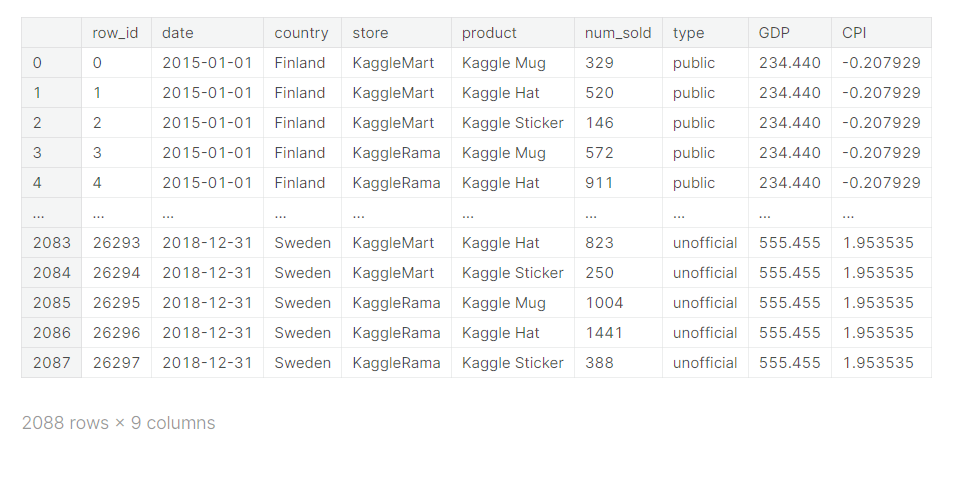